In [55]:
import pandas as pd
import numpy as np

In [56]:
gro = pd.read_csv("GroundTruth.csv")
met = pd.read_csv("Metadata.csv")

df_gro = gro.copy()
df_met = met.copy()

# Veri Setini Tanıyalım

In [57]:
df_gro.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_met.head()

,image,age_approx,anatom_site_general,lesion_id,gender
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [59]:
df_met.isnull().sum() #metadata dosyasındaki eksik gözlemler.

image                     0
age_approx              437
anatom_site_general    2631
lesion_id              2084
gender                  384
dtype: int64

In [60]:
df_met.info() #metadata dosyası hakkında bilgi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
image                  25331 non-null object
age_approx             24894 non-null float64
anatom_site_general    22700 non-null object
lesion_id              23247 non-null object
gender                 24947 non-null object
dtypes: float64(1), object(4)
memory usage: 989.6+ KB


# 1. Madde 

In [61]:
df_met = df_met.drop('lesion_id', axis = 1) #metadata dosyasında lesion_id degiskenini sildik.

In [62]:
df_met.head()

,image,age_approx,anatom_site_general,gender
0,ISIC_0000000,55.0,anterior torso,female
1,ISIC_0000001,30.0,anterior torso,female
2,ISIC_0000002,60.0,upper extremity,female
3,ISIC_0000003,30.0,upper extremity,male
4,ISIC_0000004,80.0,posterior torso,male


# 2. Madde

In [63]:
df_met = df_met.dropna() #metadata dosyasındaki eksik gözlemleri sil

In [64]:
df_met.isnull().sum() #eksik gözlem var mı tekrar kontrol edelim

image                  0
age_approx             0
anatom_site_general    0
gender                 0
dtype: int64

In [65]:
df_met.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22480 entries, 0 to 25330
Data columns (total 4 columns):
image                  22480 non-null object
age_approx             22480 non-null float64
anatom_site_general    22480 non-null object
gender                 22480 non-null object
dtypes: float64(1), object(3)
memory usage: 878.1+ KB


# 3. Madde

In [66]:
#iki veri setini birleştirmek için metod yazalım.
df1 = df_met.copy()
df2 = df_gro.copy()
    

In [67]:
data = df1.join(df2.set_index('image'), on='image') #iki veri setini image degerine göre birleştirdik.

In [68]:
data.head()

,image,age_approx,anatom_site_general,gender,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,55.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,upper extremity,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,30.0,upper extremity,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,80.0,posterior torso,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22480 entries, 0 to 25330
Data columns (total 13 columns):
image                  22480 non-null object
age_approx             22480 non-null float64
anatom_site_general    22480 non-null object
gender                 22480 non-null object
MEL                    22480 non-null float64
NV                     22480 non-null float64
BCC                    22480 non-null float64
AK                     22480 non-null float64
BKL                    22480 non-null float64
DF                     22480 non-null float64
VASC                   22480 non-null float64
SCC                    22480 non-null float64
UNK                    22480 non-null float64
dtypes: float64(10), object(3)
memory usage: 2.4+ MB


In [70]:
data.reset_index(drop=True, inplace=True) #birleştirme sonrası karışan indexleri baştan oluşturuyoruz.

In [71]:
#kanser türlerini tek bir degisken altinda topluyoruz.
def sinifla(data):
    df = data.copy() #data veri setini kopyalıyoruz.
    df["sinif"] = np.NaN #verisetine sinif adında boş degerler içeren değişken ekliyoruz.
    for i in range(len(df)):
        for j in range(4,len(df.columns)):
            if df.loc[i][j] == 1.0:
                df.loc[i,"sinif"] = df.columns[j] #herbir gözlemin columns degeri 1 olan degişken adını sınıf degiskenine ekliyoruz.
    return df

In [72]:
df = sinifla(data) #metodumuzu çalıştırıyoruz.

In [73]:
df

,image,age_approx,anatom_site_general,gender,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,sinif
0,ISIC_0000000,55.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,30.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,60.0,upper extremity,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,30.0,upper extremity,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,80.0,posterior torso,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
5,ISIC_0000006,25.0,posterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
6,ISIC_0000007,25.0,posterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
7,ISIC_0000008,30.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
8,ISIC_0000009,30.0,anterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
9,ISIC_0000010,35.0,posterior torso,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV


şimdi diğer kanser türleri olan değişkenleri veri setinden çıkaralım.

In [74]:
df = df.drop(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis = 1)

In [75]:
df.head()

,image,age_approx,anatom_site_general,gender,sinif
0,ISIC_0000000,55.0,anterior torso,female,NV
1,ISIC_0000001,30.0,anterior torso,female,NV
2,ISIC_0000002,60.0,upper extremity,female,MEL
3,ISIC_0000003,30.0,upper extremity,male,NV
4,ISIC_0000004,80.0,posterior torso,male,MEL


In [76]:
df["sinif"].value_counts() #kanser türlerine göre gözlem sayıları

NV      10632
MEL      4346
BCC      3245
BKL      2333
AK        845
SCC       622
DF        235
VASC      222
Name: sinif, dtype: int64

# 4. Madde

In [77]:
import seaborn as sns

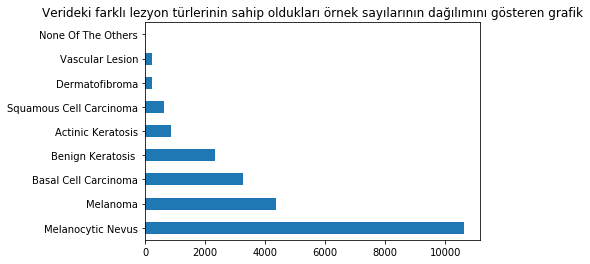

In [78]:
kanser_sayi = df['sinif'].value_counts()
kanser_sayi.index = ['Melanocytic Nevus', 'Melanoma', 'Basal Cell Carcinoma', 'Benign Keratosis ', 'Actinic Keratosis', 
                     'Squamous Cell Carcinoma', 'Dermatofibroma', 'Vascular Lesion']

unk = pd.Series([0], index=['None Of The Others'])
kanser_sayi = kanser_sayi.append(unk)

(kanser_sayi
 .plot.barh()
 .set_title('Verideki farklı lezyon türlerinin sahip oldukları örnek sayılarının dağılımını gösteren grafik'));


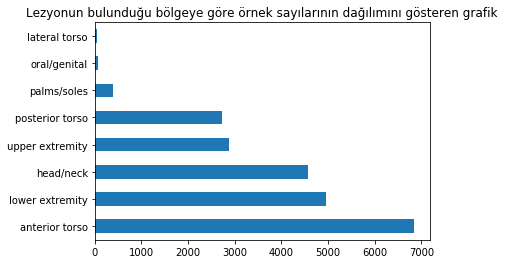

In [79]:
(df['anatom_site_general']
 .value_counts()
 .plot.barh()
 .set_title('Lezyonun bulunduğu bölgeye göre örnek sayılarının dağılımını gösteren grafik'));

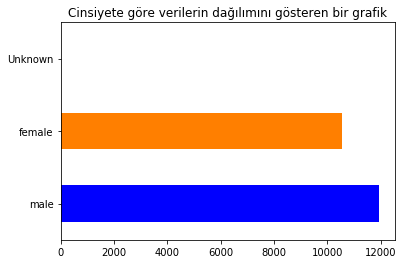

In [80]:
unk = pd.Series([0], index=['Unknown'])
(df['gender']
 .value_counts()
 .append(unk)
 .plot.barh(color = ['b','#FF7F00','r'])
 .set_title('Cinsiyete göre verilerin dağılımını gösteren bir grafik'));

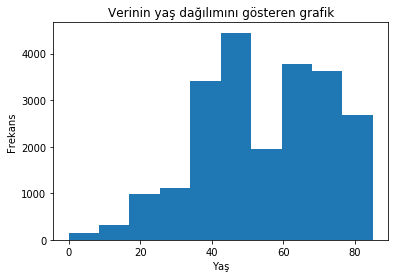

In [81]:
import matplotlib.pyplot as plt
df['age_approx'].plot.hist(title = "Verinin yaş dağılımını gösteren grafik");
plt.xlabel('Yaş');
plt.ylabel('Frekans');

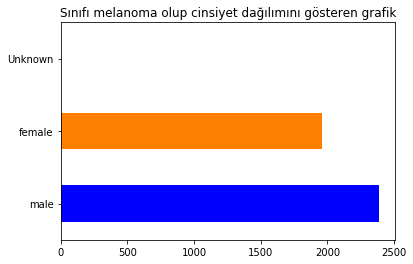

In [82]:
unk = pd.Series([0], index=['Unknown'])
(df[df['sinif'] == "MEL"]["gender"]
 .value_counts()
 .append(unk)
 .plot.barh(color = ['b','#FF7F00','r'])
 .set_title('Sınıfı melanoma olup cinsiyet dağılımını gösteren grafik'));

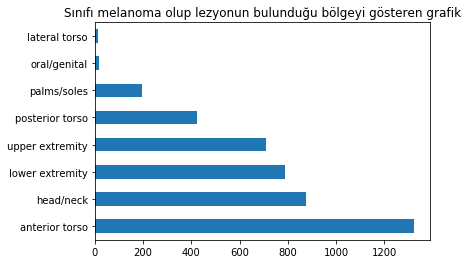

In [83]:
(df[df['sinif'] == "MEL"]["anatom_site_general"]
 .value_counts()
 .plot.barh()
 .set_title('Sınıfı melanoma olup lezyonun bulunduğu bölgeyi gösteren grafik'));

# 5. Madde

In [84]:
df.head()

,image,age_approx,anatom_site_general,gender,sinif
0,ISIC_0000000,55.0,anterior torso,female,NV
1,ISIC_0000001,30.0,anterior torso,female,NV
2,ISIC_0000002,60.0,upper extremity,female,MEL
3,ISIC_0000003,30.0,upper extremity,male,NV
4,ISIC_0000004,80.0,posterior torso,male,MEL


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22480 entries, 0 to 22479
Data columns (total 5 columns):
image                  22480 non-null object
age_approx             22480 non-null float64
anatom_site_general    22480 non-null object
gender                 22480 non-null object
sinif                  22480 non-null object
dtypes: float64(1), object(4)
memory usage: 878.2+ KB


In [86]:
dff = df.copy()

In [87]:
dff = dff.drop(['image'], axis = 1) #image verisi burada anlam taşımadığı için çıkarıyorum.

In [88]:
dff.head()

,age_approx,anatom_site_general,gender,sinif
0,55.0,anterior torso,female,NV
1,30.0,anterior torso,female,NV
2,60.0,upper extremity,female,MEL
3,30.0,upper extremity,male,NV
4,80.0,posterior torso,male,MEL


In [89]:
from sklearn import preprocessing

In [90]:
lbe = preprocessing.LabelEncoder()

In [91]:
dff["anatom_site_general"] = lbe.fit_transform(dff["anatom_site_general"])
dff["gender"] = lbe.fit_transform(dff["gender"])
dff["sinif"] = lbe.fit_transform(dff["sinif"])

In [92]:
y = dff["sinif"]
X = dff.drop(["sinif"], axis = 1)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [94]:
X = pd.DataFrame(X, columns = ['age_approx','anatom_site_general','gender'])

In [95]:
X.head()

,age_approx,anatom_site_general,gender
0,0.019448,-1.009170,-1.065295
1,-1.363202,-1.009170,-1.065295
2,0.295978,1.714910,-1.065295
3,-1.363202,1.714910,0.938707
4,1.402098,1.325756,0.938707


In [96]:
y.head()

0    5
1    5
2    4
3    5
4    4
Name: sinif, dtype: int32

# 6. Madde

## 6.1. Lojistik Regresyon

In [113]:
from sklearn.metrics import f1_score, average_precision_score, classification_report, recall_score, accuracy_score, confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')

In [114]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 5)

In [115]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "newton-cg", multi_class = "multinomial")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
y_pred = loj_model.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred)

0.5131227758007118

In [118]:
confusion_matrix(y_test, y_pred)

array([[   0,   86,    0,    0,   13,   71,    0,    0],
       [   0,  261,    0,    0,   87,  284,    0,    0],
       [   0,  140,    0,    0,   75,  259,    0,    0],
       [   0,    2,    0,    0,    4,   36,    0,    0],
       [   0,  247,    0,    0,  129,  493,    0,    0],
       [   0,  112,    0,    0,  113, 1917,    0,    0],
       [   0,   54,    0,    0,   35,   36,    0,    0],
       [   0,   12,    0,    0,    8,   22,    0,    0]], dtype=int64)

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.29      0.41      0.34       632
           2       0.00      0.00      0.00       474
           3       0.00      0.00      0.00        42
           4       0.28      0.15      0.19       869
           5       0.61      0.89      0.73      2142
           6       0.00      0.00      0.00       125
           7       0.00      0.00      0.00        42

    accuracy                           0.51      4496
   macro avg       0.15      0.18      0.16      4496
weighted avg       0.39      0.51      0.43      4496



## 6.2. Naive Bayes

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
y_pred = nb_model.predict(X_test)

In [124]:
confusion_matrix(y_test, y_pred)

array([[   0,   96,    0,    0,   16,   70,    0,    0],
       [   0,  288,    0,    0,   81,  277,    0,    0],
       [   0,  184,    0,    0,   58,  247,    0,    0],
       [   0,    3,    0,    0,    3,   41,    0,    0],
       [   0,  206,    0,    0,  124,  502,    0,    0],
       [   0,  130,    0,    0,   95, 1894,    0,    0],
       [   0,   62,    0,    0,   29,   30,    0,    0],
       [   0,    8,    0,    0,   14,   38,    0,    0]], dtype=int64)

In [125]:
accuracy_score(y_test, y_pred)

0.5129003558718861

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       182
           1       0.29      0.45      0.35       646
           2       0.00      0.00      0.00       489
           3       0.00      0.00      0.00        47
           4       0.30      0.15      0.20       832
           5       0.61      0.89      0.73      2119
           6       0.00      0.00      0.00       121
           7       0.00      0.00      0.00        60

    accuracy                           0.51      4496
   macro avg       0.15      0.19      0.16      4496
weighted avg       0.39      0.51      0.43      4496



## 6.3. SVM

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 5)

In [128]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [129]:
y_pred = svm_model.predict(X_test)

In [130]:
confusion_matrix(y_test, y_pred)

array([[   0,   88,    0,    0,    8,   74,    0,    0],
       [   0,  269,    0,    0,   68,  295,    0,    0],
       [   0,  154,    0,    0,   56,  264,    0,    0],
       [   0,    2,    0,    0,    3,   37,    0,    0],
       [   0,  257,    0,    0,   94,  518,    0,    0],
       [   0,  121,    0,    0,   86, 1935,    0,    0],
       [   0,   57,    0,    0,   31,   37,    0,    0],
       [   0,   13,    0,    0,    7,   22,    0,    0]], dtype=int64)

In [131]:
accuracy_score(y_test, y_pred)

0.5111209964412812

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.28      0.43      0.34       632
           2       0.00      0.00      0.00       474
           3       0.00      0.00      0.00        42
           4       0.27      0.11      0.15       869
           5       0.61      0.90      0.73      2142
           6       0.00      0.00      0.00       125
           7       0.00      0.00      0.00        42

    accuracy                           0.51      4496
   macro avg       0.14      0.18      0.15      4496
weighted avg       0.38      0.51      0.42      4496



## 6.4. KNN

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 5)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(11)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [135]:
y_pred = knn_model.predict(X_test)

In [136]:
confusion_matrix(y_test, y_pred)

array([[  30,   84,    1,    0,   17,   37,    1,    0],
       [  50,  267,   31,    0,   55,  207,   22,    0],
       [  42,  141,   33,    0,   63,  186,    9,    0],
       [   0,    5,    0,    0,    2,   35,    0,    0],
       [  49,  207,   21,    0,  143,  441,    8,    0],
       [  12,  141,   53,    0,   90, 1838,    8,    0],
       [  13,   44,    3,    0,   13,   36,   16,    0],
       [   0,   15,    1,    0,    3,   19,    4,    0]], dtype=int64)

In [137]:
accuracy_score(y_test, y_pred)

0.5175711743772242

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.18      0.16       170
           1       0.30      0.42      0.35       632
           2       0.23      0.07      0.11       474
           3       0.00      0.00      0.00        42
           4       0.37      0.16      0.23       869
           5       0.66      0.86      0.74      2142
           6       0.24      0.13      0.17       125
           7       0.00      0.00      0.00        42

    accuracy                           0.52      4496
   macro avg       0.24      0.23      0.22      4496
weighted avg       0.46      0.52      0.47      4496



# 6.5 YSA

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 5)

In [141]:
from sklearn.neural_network import MLPClassifier

In [155]:
mlpc = MLPClassifier().fit(X_train, y_train)

In [156]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [157]:
y_pred = mlpc.predict(X_test)
accuracy_score(y_test, y_pred)

0.5329181494661922

In [147]:
confusion_matrix(y_test, y_pred)

array([[   0,   90,   32,    0,    9,   39,    0,    0],
       [   0,  251,   30,    0,   89,  262,    0,    0],
       [   0,  163,   41,    0,   39,  231,    0,    0],
       [   0,    1,    0,    0,    3,   38,    0,    0],
       [   0,  222,   19,    0,  130,  498,    0,    0],
       [   0,   69,   22,    0,   83, 1968,    0,    0],
       [   0,   57,    1,    0,   22,   45,    0,    0],
       [   0,   15,    1,    0,    2,   24,    0,    0]], dtype=int64)

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.29      0.40      0.33       632
           2       0.28      0.09      0.13       474
           3       0.00      0.00      0.00        42
           4       0.34      0.15      0.21       869
           5       0.63      0.92      0.75      2142
           6       0.00      0.00      0.00       125
           7       0.00      0.00      0.00        42

    accuracy                           0.53      4496
   macro avg       0.19      0.19      0.18      4496
weighted avg       0.44      0.53      0.46      4496



## 6.6 Karar Ağaçları

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 5)

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [162]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [163]:
y_pred = cart_model.predict(X_test)

In [164]:
accuracy_score(y_test, y_pred)

0.5429270462633452

In [165]:
confusion_matrix(y_test, y_pred)

array([[  26,   62,   11,    0,   34,   37,    0,    0],
       [  17,  202,   21,    0,  125,  259,    8,    0],
       [  20,  104,   41,    0,   76,  228,    5,    0],
       [   0,    2,    0,    0,    3,   37,    0,    0],
       [  10,  158,   19,    0,  218,  459,    4,    1],
       [   7,   50,   27,    0,  116, 1940,    2,    0],
       [   0,   43,    4,    0,   22,   42,   14,    0],
       [   0,   10,    2,    0,    8,   21,    1,    0]], dtype=int64)

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.15      0.21       170
           1       0.32      0.32      0.32       632
           2       0.33      0.09      0.14       474
           3       0.00      0.00      0.00        42
           4       0.36      0.25      0.30       869
           5       0.64      0.91      0.75      2142
           6       0.41      0.11      0.18       125
           7       0.00      0.00      0.00        42

    accuracy                           0.54      4496
   macro avg       0.30      0.23      0.24      4496
weighted avg       0.48      0.54      0.49      4496



# 7. Madde

In [167]:
modeller = [
    knn_model,
    loj_model,
    svm_model,
    nb_model,
    mlpc,
    cart_model
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 51.7571%
----------------------------
LogisticRegression:
Accuracy: 51.3123%
----------------------------
SVC:
Accuracy: 51.1121%
----------------------------
GaussianNB:
Accuracy: 51.4680%
----------------------------
MLPClassifier:
Accuracy: 53.2918%
----------------------------
DecisionTreeClassifier:
Accuracy: 54.2927%


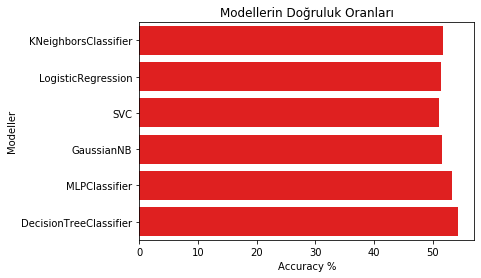

In [168]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');  